In [1]:
# 实现ID3决策树：criterion='gini'即为CART分类树

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree #决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.decomposition import PCA #主成分分析
from sklearn.feature_selection import SelectKBest #特征选择
from sklearn.feature_selection import chi2 #卡方统计量
from sklearn.preprocessing import MinMaxScaler

from yuan.utils.plots import chinese_setting  # 让matplotlib正常显示中文
chinese_setting()

## 设置属性防止中文乱码
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

开始设置中文...
设置字体...
请重启kernel测试...


In [2]:
# 1，加载数据：
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'


data = pd.read_csv('../DataSets/iris.data', header=None)
x=data[list(range(4))]#获取X变量
y=pd.Categorical(data[4]).codes#把Y转换成分类型的0,1,2

x_train, x_test, y_train, y_test  = train_test_split(x, y, train_size=0.8, random_state=66)

y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

ss = MinMaxScaler ()   # 数据归一化
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

ch2 = SelectKBest(chi2,k=3)  # 特征选择：在当前的案例中，使用SelectKBest这个方法从4个原始的特征属性，选择出来3个

x_train = ch2.fit_transform(x_train, y_train)#训练并转换
x_test = ch2.transform(x_test)#转换

select_name_index = ch2.get_support(indices=True)
print(select_name_index)

pca = PCA(n_components=2) # 降维：构建一个pca对象，设置最终维度是2维
x_train = pca.fit_transform(x_train)#训练并转换
x_test = pca.transform(x_test)#转换

[0 2 3]


/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
# 2，ID3模型：
model = DecisionTreeClassifier(criterion='entropy',random_state=0)#另外也可选gini,"gini" for the Gini impurity and "entropy" for the information gain
model.fit(x_train, y_train)

y_test_hat = model.predict(x_test)   # 预测

y_test1 = y_test.reshape(-1)  # 模型评估
result = (y_test1 == y_test_hat)
print ("准确率:%.2f%%" % (np.mean(result) * 100))

准确率:83.33%


(100, 100)


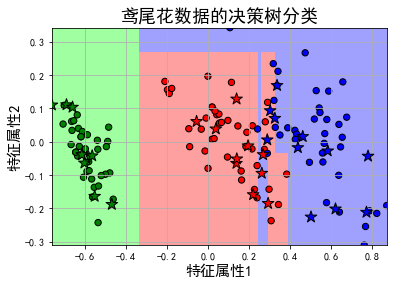

In [4]:
# 3,画图:
N = 100  #横纵各采样多少个值
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] #测试点
y_show_hat = model.predict(x_show) #预测值
y_show_hat = y_show_hat.reshape(x1.shape)  #使之与输入的形状相同
print(y_show_hat.shape)
y_show_hat[0]



plt_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = matplotlib.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) 
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()

In [5]:
# 4,保存决策树结构图pdf：
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None, filled=True, proportion=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("../OutPut/iris—decision_tree.pdf") 

True

In [6]:
# 5,github开源学习项目上面的决策树code：
import graphviz
import itertools
import random 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder

# The possible values for each class 
classes = {
    'supplies': ['low', 'med', 'high'],
    'weather':  ['raining', 'cloudy', 'sunny'],
    'worked?':  ['yes', 'no']
}

# Our example data from the documentation
data = [
    ['low',  'sunny',   'yes'],
    ['high', 'sunny',   'yes'],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'cloudy',  'no' ],
    ['high', 'sunny',   'no' ],
    ['high', 'raining', 'no' ],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'raining', 'no' ],
    ['med',  'sunny',   'no' ],
    ['high', 'sunny',   'yes']
]

# Our target variable, whether someone went shopping
target = ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no']

# Scikit learn can't handle categorical data, so form numeric representations of the above data
# Categorical data support may be added in the future: https://github.com/scikit-learn/scikit-learn/pull/4899
categories = [classes['supplies'], classes['weather'], classes['worked?']]
encoder = OneHotEncoder(categories=categories)

x_data = encoder.fit_transform(data)

# Form and fit our decision tree to the now-encoded data
classifier = DecisionTreeClassifier()
tree = classifier.fit(x_data, target)

# Now that we have our decision tree, let's predict some outcomes from random data
# This goes through each class and builds a random set of 5 data points
prediction_data = []
for _ in itertools.repeat(None, 5):
    prediction_data.append([
        random.choice(classes['supplies']),
        random.choice(classes['weather']),
        random.choice(classes['worked?'])
    ])

# Use our tree to predict the outcome of the random values
prediction_results = tree.predict(encoder.transform(prediction_data))



# =============================================================================
# Output code

def format_array(arr):
    return "".join(["| {:<10}".format(item) for item in arr])

def print_table(data, results):
    line = "day  " + format_array(list(classes.keys()) + ["went shopping?"])
    print("-" * len(line))
    print(line)
    print("-" * len(line))

    for day, row in enumerate(data):
        print("{:<5}".format(day + 1) + format_array(row + [results[day]]))
    print("")

feature_names = (
    ['supplies-' + x for x in classes["supplies"]] +
    ['weather-' + x for x in classes["weather"]] +
    ['worked-' + x for x in classes["worked?"]]
)

# Shows a visualization of the decision tree using graphviz
# Note that sklearn is unable to generate non-binary trees, so these are based on individual options in each class
dot_data = export_graphviz(tree, filled=True, proportion=True, feature_names=feature_names) 
graph = graphviz.Source(dot_data)
graph.render(filename='../OutPut/decision_tree', cleanup=True, view=True)

# # #from sklearn import tree
# import pydotplus 
# dot_data = export_graphviz(tree, out_file=None) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("decision_tree.pdf") 

# Display out training and prediction data and results
print("Training Data:")
print_table(data, target)

print("Predicted Random Results:")
print_table(prediction_data, prediction_results)

Training Data:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
---------------------------------------------------------
1    | low       | sunny     | yes       | yes       
2    | high      | sunny     | yes       | no        
3    | med       | cloudy    | yes       | no        
4    | low       | raining   | yes       | no        
5    | low       | cloudy    | no        | yes       
6    | high      | sunny     | no        | no        
7    | high      | raining   | no        | no        
8    | med       | cloudy    | yes       | no        
9    | low       | raining   | yes       | no        
10   | low       | raining   | no        | yes       
11   | med       | sunny     | no        | yes       
12   | high      | sunny     | yes       | no        

Predicted Random Results:
---------------------------------------------------------
day  | supplies  | weather   | worked?   | went shopping?
--------------------

In [ ]:
?DecisionTreeClassifier